In [ ]:
import pandas as pd
data=pd.read_csv("cane.csv")
print(data)

     rownames    n   r   x  var block
0           1   87  76  19    1     A
1           2  119   8  14    2     A
2           3   94  74   9    3     A
3           4   95  11  12    4     A
4           5  134   0  12    5     A
..        ...  ...  ..  ..  ...   ...
175       176   61   2   8   41     D
176       177  154  12  35   42     D
177       178   98   0   8   43     D
178       179  129   9  14   44     D
179       180  130  24  20   45     D

[180 rows x 6 columns]


In [ ]:
data.isna().sum()

rownames    0
n           0
r           0
x           0
var         0
block       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["block"]=b.fit_transform(data["block"])
data["rownames"]=b.fit_transform(data["rownames"])
data["n"]=b.fit_transform(data["n"])
data["r"]=b.fit_transform(data["r"])
data["x"]=b.fit_transform(data["x"])
data["var"]=b.fit_transform(data["var"])
print(data)

     rownames   n   r   x  var  block
0           0  34  51  18    0      0
1           1  60   8  13    1      0
2           2  40  50   8    2      0
3           3  41  11  11    3      0
4           4  72   0  11    4      0
..        ...  ..  ..  ..  ...    ...
175       175  12   2   7   40      3
176       176  87  12  27   41      3
177       177  43   0   7   42      3
178       178  67   9  13   43      3
179       179  68  23  19   44      3

[180 rows x 6 columns]


In [ ]:
x=data.drop("block",axis=1)
y=data["block"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

     rownames    n   r   x  var
3           3   41  11  11    3
117       117   87   6  15   27
105       105   94   4   6   15
149       149   40   1  12   14
153       153   40  28  28   18
..        ...  ...  ..  ..  ...
27         27   81  21  17   27
151       151   49  23   1   16
9           9   32  14  20    9
172       172   93  32  24   37
174       174  101  46  16   39

[176 rows x 5 columns]
3      0
117    2
105    2
149    3
153    3
      ..
27     0
151    3
9      0
172    3
174    3
Name: block, Length: 176, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
c=br.predict([[181,102,90,8,45]])
print("Output :",c)

Output : [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(array([[ 5.,  0.,  0.,  2.,  0.,  0.,  4.,  0.,  0.,  5.],
        [ 4.,  0.,  0.,  9.,  0.,  0.,  6.,  0.,  0.,  4.],
        [ 8.,  0.,  0.,  4.,  0.,  0.,  9.,  0.,  0.,  6.],
        [11.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.],
        [ 5.,  0.,  0.,  4.,  0.,  0.,  2.,  0.,  0.,  7.],
        [ 5.,  0.,  0.,  9.,  0.,  0.,  5.,  0.,  0.,  7.],
        [ 5.,  0.,  0.,  3.,  0.,  0.,  4.,  0.,  0.,  3.],
        [ 1.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  0.,  3.,  0.,  0.,  1.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <matplotlib.collections.QuadMesh at 0x7b542e05a050>)

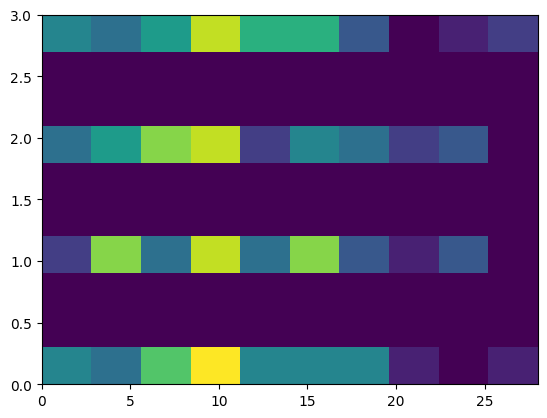

In [ ]:
from matplotlib import pyplot as plt
plt.hist2d(data["x"],data["block"])

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[2 0 0]
 [0 0 1]
 [0 0 1]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.75


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.50      0.67      0.56         4
weighted avg       0.62      0.75      0.67         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
